In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_disease_uci.csv')

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df = df.drop(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis=1)

In [5]:
df.head()

,id,age,trestbps,chol,thalch,oldpeak,num
0,1,63,145.0,233.0,150.0,2.3,0
1,2,67,160.0,286.0,108.0,1.5,2
2,3,67,120.0,229.0,129.0,2.6,1
3,4,37,130.0,250.0,187.0,3.5,0
4,5,41,130.0,204.0,172.0,1.4,0


In [6]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

id           0
age          0
trestbps    59
chol        30
thalch      55
oldpeak     62
num          0
dtype: int64


In [8]:
df.shape

(920, 7)

In [9]:
df_cleaned = df.dropna()

In [10]:
df_cleaned.head()

,id,age,trestbps,chol,thalch,oldpeak,num
0,1,63,145.0,233.0,150.0,2.3,0
1,2,67,160.0,286.0,108.0,1.5,2
2,3,67,120.0,229.0,129.0,2.6,1
3,4,37,130.0,250.0,187.0,3.5,0
4,5,41,130.0,204.0,172.0,1.4,0


In [11]:
df_cleaned.shape

(827, 7)

In [12]:
missing_values = df_cleaned.isnull().sum()
print(missing_values)

id          0
age         0
trestbps    0
chol        0
thalch      0
oldpeak     0
num         0
dtype: int64


In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

outliers = ((df < Q1 - 1.5 * IQR) | (df > (Q3 + 1.5* IQR)))
print(outliers)

        id    age  trestbps   chol  thalch  oldpeak    num
0    False  False     False  False   False    False  False
1    False  False     False  False   False    False  False
2    False  False     False  False   False    False  False
3    False  False     False  False   False    False  False
4    False  False     False  False   False    False  False
..     ...    ...       ...    ...     ...      ...    ...
915  False  False     False  False   False    False  False
916  False  False     False  False   False    False  False
917  False  False     False  False   False    False  False
918  False  False     False  False   False    False  False
919  False  False     False  False   False    False  False

[920 rows x 7 columns]


In [25]:
import seaborn as sns

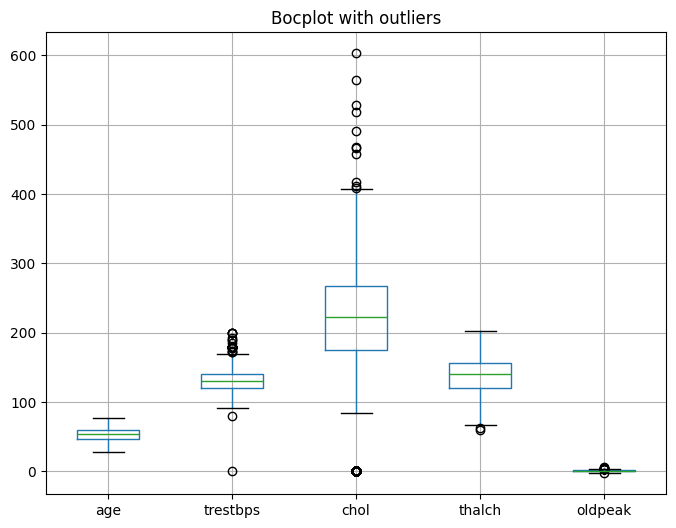

In [26]:
plt.figure(figsize=(8, 6))
df.boxplot(column=["age", "trestbps", 'chol', 'thalch', 'oldpeak'])
plt.title("Bocplot with outliers")
plt.show()

In [30]:
def remove_outliers(df, columns=None):
    clean_df = df.copy()

    for col in columns:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR

        clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]

    return clean_df

In [31]:
columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
df_cleaned = remove_outliers(df_cleaned, columns)

In [32]:
df_cleaned.head()

,id,age,trestbps,chol,thalch,oldpeak,num
0,1,63,145.0,233.0,150.0,2.3,0
1,2,67,160.0,286.0,108.0,1.5,2
2,3,67,120.0,229.0,129.0,2.6,1
3,4,37,130.0,250.0,187.0,3.5,0
4,5,41,130.0,204.0,172.0,1.4,0


In [33]:
df_cleaned.shape

(628, 7)

In [34]:
x = df_cleaned.drop('num', axis=1)
y = df_cleaned['num']

In [42]:
feature_columns = x.columns.to_list()

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [15]:
# from sklearn.preprocessing import StandardScaler

In [16]:
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.fit_transform(x_test)

In [36]:
model = RandomForestClassifier()

In [37]:
# model.fit(x_train_scaled, y_train)
model.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
# y_pred = model.predict(x_test_scaled)
y_pred = model.predict(x_test)

In [39]:
cm = confusion_matrix(y_test, y_pred)

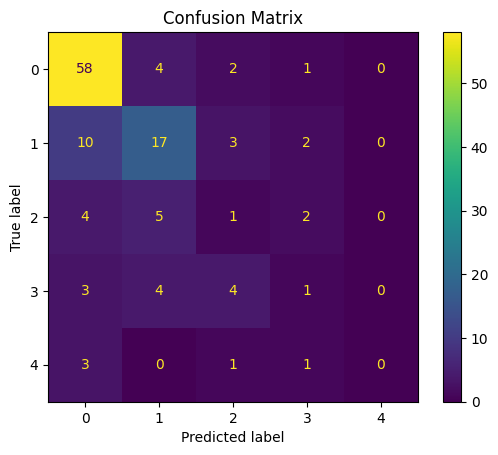

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [51]:
df_cleaned['num'].value_counts()

num
0    342
1    172
2     54
3     48
4     12
Name: count, dtype: int64

In [41]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        65
           1       0.57      0.53      0.55        32
           2       0.09      0.08      0.09        12
           3       0.14      0.08      0.11        12
           4       0.00      0.00      0.00         5

    accuracy                           0.61       126
   macro avg       0.31      0.32      0.31       126
weighted avg       0.55      0.61      0.58       126



C:\Users\BS01414.BS-01414\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\BS01414.BS-01414\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\BS01414.BS-01414\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
def predict_heart_disease(input_data: dict):
    input_df = pd.DataFrame([input_data])
    input_df = input_df[feature_columns]

    prediction = model.predict(input_df)[0]
    prediction_prob = model.predict_proba(input_df)[0]

    print("Prediction Category: ", prediction)
    print("Prediction confidence: ", prediction_prob)

In [50]:
sample_input = {
    'id': 14,
    'age': 44,
    'sex': 'Male',
    'cp': 'asymtomatic',
    'trestbps': 120,
    'chol': 263,
    'fbs': 'FALSE',
    'restecg': 'lv hypertrophy',
    'thalch': 160,
    'exang': 'TRUE',
    'oldpeak': 1.3,
    'slope': 'flat',
    'ca': 2,
    'thal': 'normal' 
}

predict_heart_disease(sample_input)

Prediction Category:  0
Prediction confidence:  [0.66 0.19 0.09 0.06 0.  ]
